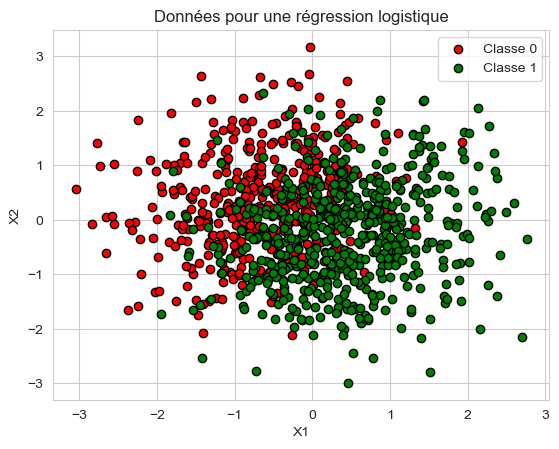

         X1        X2  y
0  1.764052  0.555963  1
1  0.400157  0.892474  1
2  0.978738 -0.422315  1
3  2.240893  0.104714  1
4  1.867558  0.228053  1


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Générer des variables explicatives aléatoires suivant une distribution normale
np.random.seed(0)
n_samples = 1000
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)

# Générer une variable cible en fonction des variables explicatives
# La relation suivie est logistique
# La probabilité d'appartenance à la classe 1 dépend de X1 et X2 selon une relation logistique
# P(Y=1) = 1 / (1 + exp(-(a*X1 + b*X2 + c)))
a, b, c = 2, -1, 0.5
probabilities = 1 / (1 + np.exp(-(a*X1 + b*X2 + c)))

# Générer la variable cible en fonction des probabilités
y = np.random.binomial(1, probabilities) #En un essai on génère une variable y

# Créer un DataFrame à partir des données générées
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Visualiser les données
#plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 0], X2[y == 0], color='red', label='Classe 0',edgecolors='k')
plt.scatter(X1[y == 1], X2[y == 1], color='green', label='Classe 1',edgecolors='k')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Données pour une régression logistique')
plt.legend()
plt.grid(True)
plt.show()

# Afficher les premières lignes du DataFrame
print(df.head())


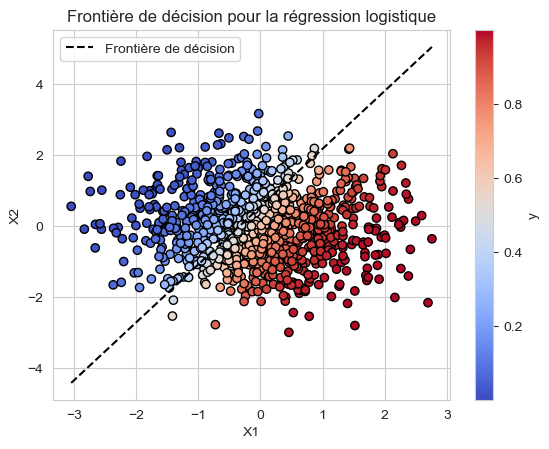

In [2]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df[['X1', 'X2']], df['y'], test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Récupérer les coefficients du modèle
coef = model.coef_[0]
intercept = model.intercept_

# Définir la fonction logistique (fonction de décision)
def decision_function(x):
    return -(intercept + coef[0]*x) / coef[1]

# Tracer les points de données
plt.scatter(df['X1'], df['X2'], c=probabilities, cmap='coolwarm', edgecolors='k')

# Tracer la frontière de décision
x_values = np.linspace(df['X1'].min(), df['X1'].max(), 100)
plt.plot(x_values, decision_function(x_values), color='black', linestyle='--', label='Frontière de décision')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Frontière de décision pour la régression logistique')
plt.legend()
plt.colorbar(label='y')
plt.show()

# TP 2IA Regression logistique

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [18]:
data = pd.read_csv('Data/breast_cancer.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
data['radius_mean'].dtype

dtype('float64')

In [20]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})



In [21]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


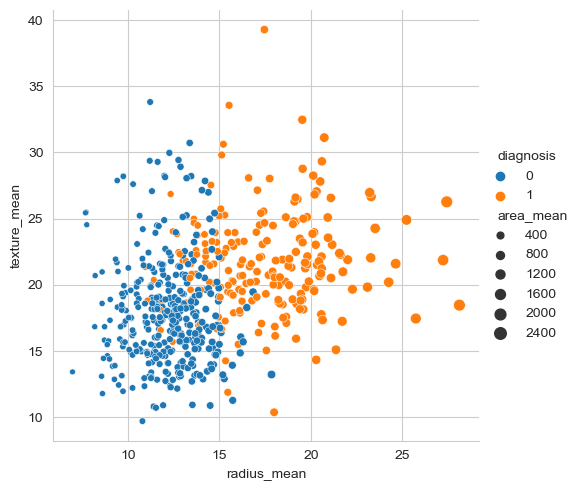

In [24]:
sns.relplot(data=data,x='radius_mean',y='texture_mean',hue='diagnosis',size='area_mean')

In [28]:
data2 = data[['radius_mean','texture_mean','area_mean','area_worst']]

In [29]:
data2

,radius_mean,texture_mean,area_mean,area_worst
0,17.99,10.38,1001.0,2019.0
1,20.57,17.77,1326.0,1956.0
2,19.69,21.25,1203.0,1709.0
3,11.42,20.38,386.1,567.7
4,20.29,14.34,1297.0,1575.0
...,...,...,...,...
564,21.56,22.39,1479.0,2027.0
565,20.13,28.25,1261.0,1731.0
566,16.60,28.08,858.1,1124.0
567,20.60,29.33,1265.0,1821.0


In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(data2,data['diagnosis'],test_size=0.2,random_state=42)

In [47]:
model = LogisticRegression()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9473684210526315

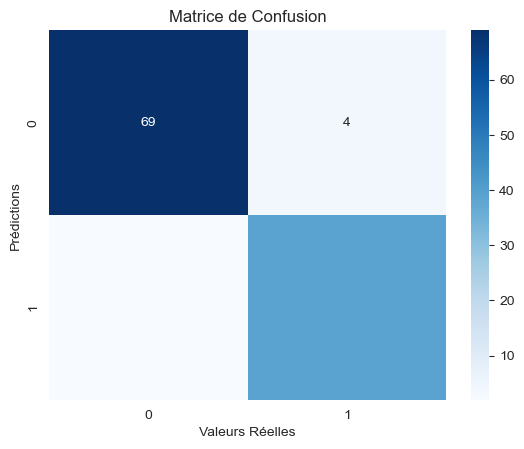

In [51]:
y_pred = model.predict(X_test)
y_true = Y_test
conf_matrix = confusion_matrix(y_pred, y_true)

# Création d'une heatmap pour visualiser la matrice de confusion
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.ylabel('Prédictions')
plt.xlabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

In [41]:
coef

array([-0.03422089,  0.28739452, -0.02122066,  0.02776499])